<a href="https://colab.research.google.com/github/pablopsz/data_science/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar uma das principais preocuoações das instituições financeiras como bancos e *fintechs*: fraudes em cartões de crédito. No Brasil, 2 a cada 10 pessoas já sofreram fraudes de cartão de crédito (cerca de 107,4 milhões de pessoas). Segundo um estudo realizado pela ["Card Fraud Losses Worldwide"](https://tiinside.com.br/23/11/2023/pci-dss-4-0-pessoas-processos-e-ia-sao-criticos-para-a-protecao-dos-cartoes-de-credito/#:~:text=Em%20todo%20o%20mundo%20prevê,de%202022%20do%20Nilson%20Report.),em todo o mundo, as cifras de perdas causadas por fraudes em cartões de crédito atingirão a marca de 49 bilhões de dólares até 2030.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>


Um fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*.

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor ou igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [58]:
# importar os pacotes necessários
import os
from google.colab import userdata
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# credenciais para acessar a api do Kaggle, fonte dos dados
os.environ['KAGGLE_USERNAME'] = userdata.get('username')
os.environ['KAGGLE_KEY'] = userdata.get('key')

# baixando o arquivo que utilizaremos
import kaggle
kaggle.api.dataset_download_files('mlg-ulb/creditcardfraud', path='./data', unzip=True)

Agora que baixamos o arquivo, vamos ler e transformar ele em um Pandas DataFrame. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [59]:
# importar os dados para um dataframe
df = pd.read_csv("/content/data/creditcard.csv")

## Análise Exploratória

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

In [60]:
# visualizar dimensões do data frame
print(f'Número de variáveis:{df.shape[0]}')
print(f'Número de variáveis:{df.shape[1]}')

Número de variáveis:284807
Número de variáveis:31


In [61]:
# ver as 5 primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [62]:
# ver 5 ultimas entradas
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Agora que vimos o corpo do nosso dataframe, vamos ver alguns dados estatísticos do nosso dataset.

In [63]:
# resumo estatistico do dataframe
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Vamos voltar nossa atenção agora para nossa variável alvo. Como dito anteriormente, ela possui valores totalmente desbalanceados (que trataremos mais pra frente no projeto). Por agora, vamos visualizar a distribuição desses valores.

0    0.998273
1    0.001727
Name: Class, dtype: float64

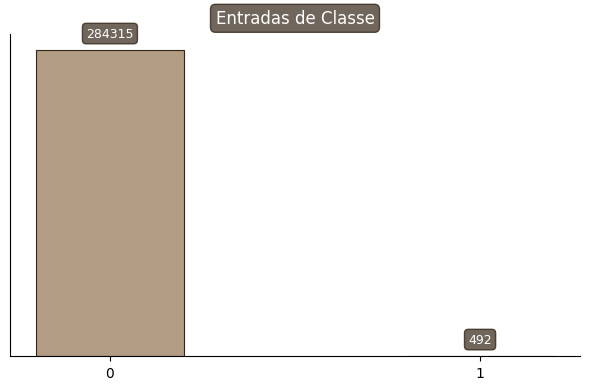

In [64]:
# figura do grafico
fig, ax = plt.subplots(figsize=(6,4))

# Contando a frequancia de cada valor na coluna 'Class'
value_counts = df['Class'].value_counts()

# Criando o barplot
plt.bar(value_counts.index, value_counts.values, color='#B39C84', width=0.4, edgecolor='#332617', linewidth=0.8)

# Configuraçao da caixa de corte para garantir que o texto não sobressaia alem das barras
clip_box = plt.gca().transData

# Propriedades da caixa dos rotulos
bbox_props = dict(boxstyle='round', facecolor='#4C4032', edgecolor='#332617', alpha=0.8)

# Adicionando rotulos para cada barra
for i, value in enumerate(value_counts):
    plt.text(i, value + 15000, str(value),
             color='white', bbox=bbox_props, clip_box=clip_box, ha='center', va='center', fontsize=9)

# Configurando ticks do eixo x
plt.xticks(value_counts.index)

# Removendo os ticks do eixo y
plt.yticks([])

# Removendo Spines da direita e cima
ax.spines[['right', 'top']].set_visible(False)

# Propriedades da caixa do titulo
title_box_props = dict(boxstyle='round', facecolor='#4C4032', edgecolor='#332617', alpha=0.8)

# Adicionando o titulo
plt.text(0.5, 1.05, 'Entradas de Classe', transform=ax.transAxes,
         color='white', fontsize=12, ha='center', va='center', bbox=title_box_props)

plt.tight_layout()

# porcentagem que cada valor representa na variavel
df.Class.value_counts()/df.shape[0]

Agora, vamos ver a distribuição da variável 'Time' para cada valor da variável 'Class'.

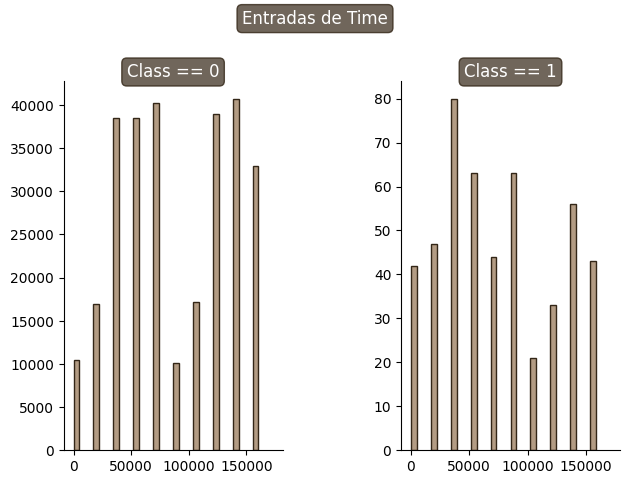

In [65]:
# figura do grafico
fig, ax = plt.subplots(nrows=1, ncols=2)

# funcao para criar e formatar o grafico
def phist (ax, X, titulo=None, width=100):
  ax.hist(X, width=width, color='#B39C84', edgecolor='#332617')
  ax.spines[['right', 'top']].set_visible(False)

  if titulo:
      title_box_props = dict(boxstyle='round', facecolor='#4C4032', edgecolor='#332617', alpha=0.8)
      ax.set_title(titulo, color='white', fontsize=12, ha='center', va='center', bbox=title_box_props)

# criar um grafico para cada valor da variavel 'Class'
phist(ax[0],df[df.Class == 0]['Time'], width=5000, titulo='Class == 0')
phist(ax[1],df[df.Class == 1]['Time'], width=5000, titulo='Class == 1')

# propriedade das caixas
title_box_props = dict(boxstyle='round', facecolor='#4C4032', edgecolor='#332617', alpha=0.8)

# adicionando o titulo com a caixa ao redor para ambos os subplots
plt.text(0.5, 0.98, 'Entradas de Time', transform=fig.transFigure,
         color='white', fontsize=12, ha='center', va='center', bbox=title_box_props)

plt.tight_layout();

Vamos fazer o mesmo para a variável 'Amount'.

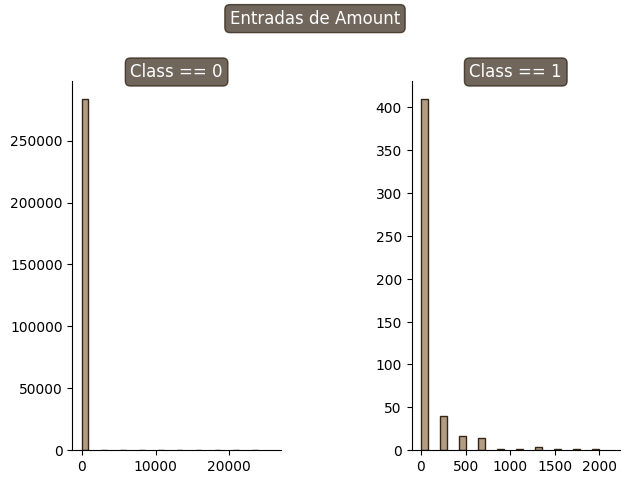

In [66]:
# figura do grafico
fig, ax = plt.subplots(nrows=1, ncols=2)

# funcao para criar e formatar o grafico
def phist (ax, X, titulo=None, width=100):
  ax.hist(X, width=width, color='#B39C84', edgecolor='#332617')
  ax.spines[['right', 'top']].set_visible(False)

  if titulo:
      title_box_props = dict(boxstyle='round', facecolor='#4C4032', edgecolor='#332617', alpha=0.8)
      ax.set_title(titulo, color='white', fontsize=12, ha='center', va='center', bbox=title_box_props)

# criar um grafico para cada valor da variavel 'Class'
phist(ax[0],df[df.Class == 0]['Amount'], width=800, titulo='Class == 0')
phist(ax[1],df[df.Class == 1]['Amount'], width=80, titulo='Class == 1')

# propriedade das caixas
title_box_props = dict(boxstyle='round', facecolor='#4C4032', edgecolor='#332617', alpha=0.8)

# adicionando o título com a caixa ao redor para ambos os subplots
plt.text(0.5, 0.98, 'Entradas de Amount', transform=fig.transFigure,
         color='white', fontsize=12, ha='center', va='center', bbox=title_box_props)

plt.tight_layout();

Podemos ver que a variável 'Amount' possui uma distribuição um pouco particular quando a variável 'Class' possui valores iguais a 1. Vamos plotar um boxplot para visualizar esses valores.

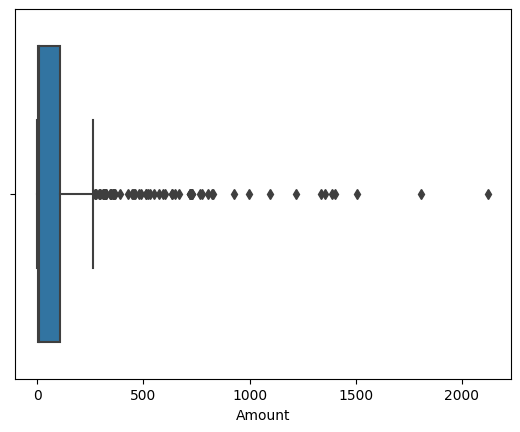

In [67]:
# figura do gráfico
fig, ax = plt.subplots()

# gráfico de caixa
sns.boxplot(data=df[df.Class == 1], x='Amount')

plt.show();

Para finalizar a parte exploratória do nosso projeto, vamos ver como as variáveis do nosso dataset se correlacionam.

In [68]:
# figura do nosso grafico
fig, ax = plt.subplots(figsize=(14,8), dpi=800)

# mapa de calor representando as correlações das variaveis
sns.heatmap(df.corr(),linewidths=.5, annot=True, fmt='.2%', annot_kws={'size': 5} ,cmap='viridis')

plt.tight_layout()

## Preparação dos Dados

Agora vamos preparar nossos dados. Nessa seção nós vamos:

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Balancear o conjunto de dados
* Dividir o conjunto de dados entre treino e validação

Antes de normalizar as variáveis 'Time' e 'Amount', vamos ver como elas são.

In [69]:
# ver as 5 primeiras entradas das variaveis 'Time' e 'Amount'
df[['Time', 'Amount']].head()

,Time,Amount
0,0.0,149.62
1,0.0,2.69
2,1.0,378.66
3,1.0,123.50
4,2.0,69.99


Agora vamos usar a função `StandardScaler` para normalizar essas variáveis. Antes de realizar essa normalização, vamos entender o que de fato irá acontecer com nossos dados. Quando começamos a ler a própria [documentação da função StandarScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), nos deparamos com a seguinte informação: "A padronização de um conjunto de dados é um requisito comum para muitos estimadores de aprendizado de máquina: eles podem se comportar mal se características individuais não se parecem mais ou menos com o padrão normalmente dados distribuídos".

Para simplificar, vamos padronizar os dados dessas duas variáveis. Para mais informações, clique [aqui](https://medium.com/@mhvasconcelos/distribuição-normal-e-a-biblioteca-standard-scaler-em-python-f21c52070c6b#:~:text=Quando%20aplicamos%20o%20StandardScaler%20aos,padrão%20seja%20igual%20a%20um.) para ler mais sobre a função.

In [70]:
# importar a funcao
from sklearn.preprocessing import StandardScaler

# instanciar o Scaler
scaler = StandardScaler()

# realizar o fit no scaler com as variaveis que desejamos padronizar
scaler.fit(df[['Time', 'Amount']])

# atribuir os valores padronizados
df[['Time', 'Amount']] = scaler.transform(df[['Time', 'Amount']])

Agora vamos ver novamente as 5 primeiras entradas dessas duas variáveis.

In [71]:
# ver as 5 primeiras entradas das variaveis 'Time' e 'Amount' após a padronizaçao
df[['Time', 'Amount']].head()

,Time,Amount
0,-1.996583,0.244964
1,-1.996583,-0.342475
2,-1.996562,1.160686
3,-1.996562,0.140534
4,-1.996541,-0.073403


Antes de criar nosso modelo de fato, vamos também balancear nossos dados da variável alvo utilizando a função [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html). A técnica que utilizaremos aqui é o `over-sampling`. Basicamente vamos, vamos utilizar estatística para replicar dados e balancear nossos dados da variável alvo. Para entender mais sobre balanceamento de dados, clique [aqui](https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/).

In [72]:
# importar a funcao para balancear os dados
from imblearn.over_sampling import SMOTE

# separar nossas variaveis independentes
X = df.drop('Class', axis=1)

# separar nossa variavel alvo
y = df['Class']

# instanciar nosso agente de balanceamento
smote_bal = SMOTE()

# realizar o balanceamento dos dados
X_res, y_res = smote_bal.fit_resample(X, y)

Agora vamos separar nossos dados de treino e teste.

In [73]:
# importar a funcao para separar os dados de treino e teste
from sklearn.model_selection import train_test_split

# separar nossos dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res)

## Modelo de Machine Learning

Agora que temos tudo preparado, vamos criar, treinar e testar nosso modelo. Para esse projeto o modelo escolhido é o `LogisticRegression`.

In [74]:
# importar nosso modelo de regressao logistica
from sklearn.linear_model import LogisticRegression

# instanciar nosso modelo
model = LogisticRegression(max_iter=1000)

# treinar nosso modelo
model.fit(X_train, y_train)

# testar nosso modelo
y_pred = model.predict(X_test)

## Avaliar o desempenho do modelo
Para entender como nosso modelo performa, vamos utilizar algumas métricas da biblioteca `sklearn.metrics`. Para ser mais específico, vamos focar nas seguintes métricas:

* $Accuracy = \frac{Tp + Tn}{Tp + Tn + Fp + Fn}$ (clique [aqui](https://developers.google.com/machine-learning/crash-course/classification/accuracy?hl=pt-br) para saber mais).

* $Precision = \frac{Tp}{Tp + Fp}$ (clique [aqui](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall?hl=pt-br) para saber mais).

* $Recall = \frac{Tp}{Tp + Fn}$ (clique [aqui](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall?hl=pt-br) para saber mais).

* $F1 = \frac{2 . Precision . Recall}{Precision + Recall}$ (clique [aqui](https://www.v7labs.com/blog/f1-score-guide) para saber mais).

In [75]:
# importar as matricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# instanciar as matricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# exibir as matricas
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Acurácia: 0.9481
Precisão: 0.9746
Recall: 0.9203
F1 Score: 0.9467


Vamos também plotar um mapa de calor representando nossas previsões por meio de uma confusion matrix.

<Axes: >

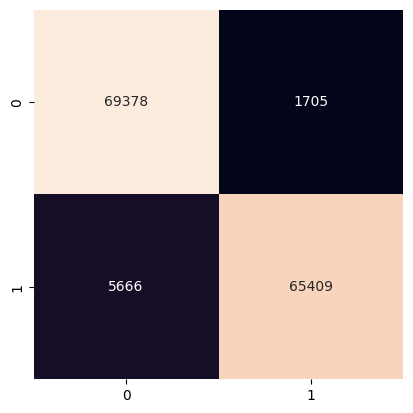

In [76]:
# criar a matriz de confusao
conf_matrix = confusion_matrix(y_test, y_pred)

# plotar o mapa de calor
sns.heatmap(conf_matrix, square=True, annot=True, cbar=False, fmt='d')

## Conclusão

Por mais que se trate de um projeto simples, podemos ver que, com poucas linhas de código, podemos criar um modelo relativamente efetivo (logicamente, se tratando de fraudes bancárias, 1% de melhoria em qualquer uma das métricas pode significar uma quantia enorme de dinheiro e esse tipo de projeto sempre tem espaço para melhorias), porém é necessário se atentar a detalhes como balanceamento de dados.

Esse tipo de projeto pode ser aplicado para as mais diversas situações e tem um valor inestimável em nossa sociedade.